In [2]:
import matplotlib.pyplot as plt

# 초승달 모양의 데이터셋을 생성해줍니다.
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 필요한 모델들을 불러옵니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

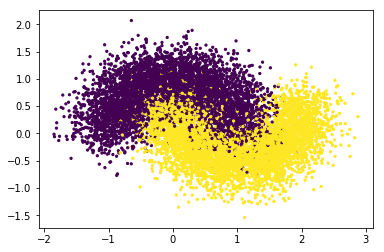

In [83]:
# 데이터 생성
X, y = make_moons(n_samples=10000, noise=.3, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.show()

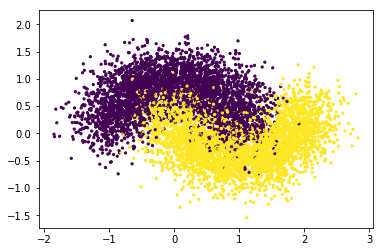

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=5)
plt.show()

## Basic Decision Tree

In [85]:
# Basic Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8853333333333333


## Random Forest

In [86]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9156666666666666


## AdaBoost

In [87]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9183333333333333


## Gradient Boosting

In [88]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9186666666666666


# XGBoost 테스트
conda install -c anaconda py-xgboost

In [89]:
import xgboost as xgb

# 파라미터 튜팅이 좀 필요할듯한데 hyperparameter optimization 좀 알아봐야할듯
param = {'max_depth':6, 'eta':0.5, 'objective':'binary:logistic'}
num_round = 10

train_data = xgb.DMatrix(data=X_train, label=y_train)
test_data = xgb.DMatrix(data=X_test, label=y_test)

bst = xgb.train(param, train_data, num_round)

# make prediction
preds = bst.predict(test_data)

binarized_pred = [1 if i>0.5 else 0 for i in preds]

print(accuracy_score(y_test, binarized_pred))

0.9196666666666666


#### 해보고 나니 데이터가 너무 쉬워서 뭐 잘하는건지 아닌건지 잘 모르겠다 
다른 데이터셋에도 테스트 필요